In [14]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [4]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

X_train.shape,y_train.shape ,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

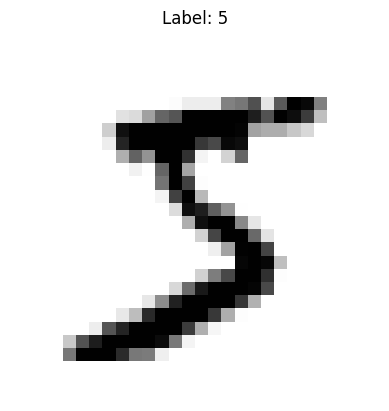

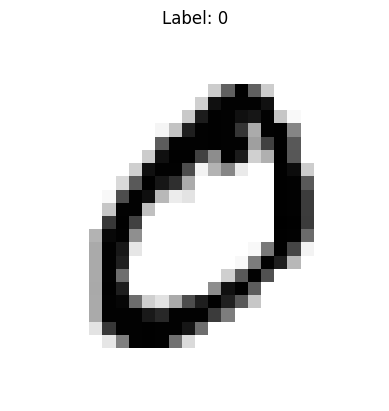

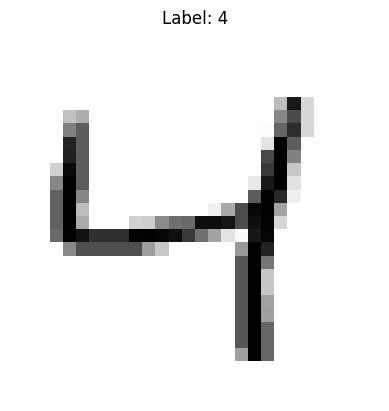

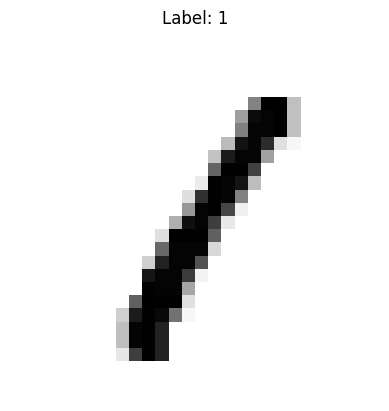

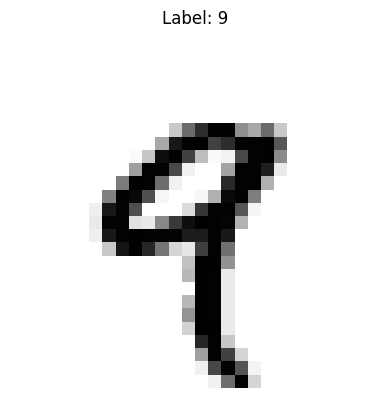

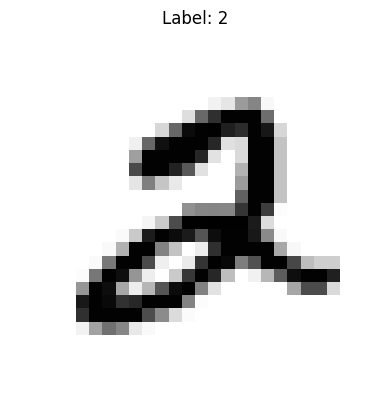

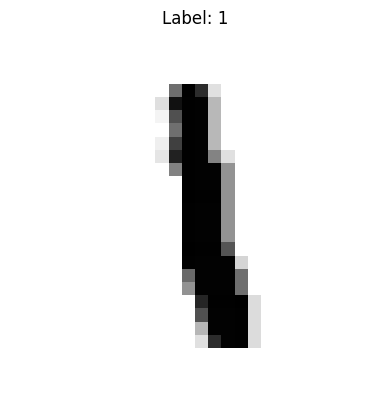

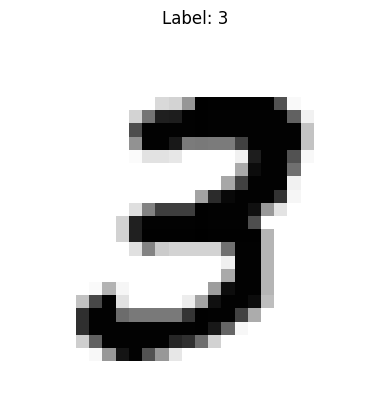

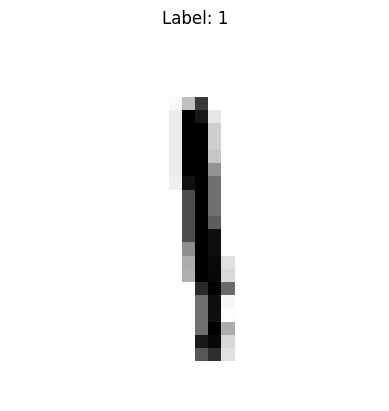

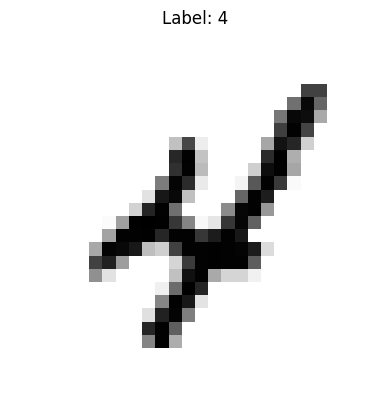

In [ ]:
for i in range(10):
    plot_input_img(i)

#Pre Processing the images

In [10]:
X_train=X_train.astype(np.float32) / 255
X_test=X_test.astype(np.float32) / 255

# Reshape the data to add a channel dimension (28,28,1)
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [12]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [15]:
model= Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))


c:\Users\justi\OneDrive\Desktop\Mini-Projects\Machine Learning Projects\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [23]:
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Early Stopping
es= EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=4, verbose=1)

#model checkpoint
mc= ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

cb=[es, mc]

#Model Training

In [24]:
his= model.fit(X_train, y_train, epochs=50, validation_split=0.3,callbacks=cb)

Epoch 1/50
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0055
Epoch 1: val_accuracy improved from -inf to 0.99000, saving model to ./best_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9900 - val_loss: 0.0518
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9985 - loss: 0.0039
Epoch 2: val_accuracy did not improve from 0.99000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9985 - loss: 0.0039 - val_accuracy: 0.9899 - val_loss: 0.0526
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9979 - loss: 0.0053
Epoch 3: val_accuracy did not improve from 0.99000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9979 - loss: 0.0053 - val_accuracy: 0.9897 - val_loss: 0.0625
Epoch 4/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9986 - loss: 0.0047
Epoch 4: val_accuracy did not improve from 0.99000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9986 - loss: 0.0047 - val_accuracy: 0.9893 - val_loss: 0.0616
Epoch 5/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9984 - loss: 0.0052
Epoch 5:

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9912 - val_loss: 0.0582
Epoch 5: early stopping


In [25]:
model_S=keras.models.load_model("C://Users//justi//OneDrive//Desktop//Mini-Projects//Machine Learning Projects//Handwritten_Digit_Recognition//best_model.h5")

In [26]:
score= model_S.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9887 - loss: 0.0575
Test Loss: 0.046084340661764145
Test Accuracy: 0.9911999702453613
